<a href="https://colab.research.google.com/github/visharaaa/Math-CW-25/blob/main/2425578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Modelling Travel Time**

#### (a)  Calculate the gradient $\nabla T$ for each mode of transport.

*Hint:* The gradient of a scalar field $T$ is defined as:

$$
\nabla T = \left( \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right)
$$

---


**Bus Travel Time Function:**

$$
T_b(x, y) = a x^2 + b y^2
$$

Partial derivatives:

$$
\frac{\partial T_b}{\partial x} = 2ax, \quad
\frac{\partial T_b}{\partial y} = 2by
$$

Gradient:

$$
\nabla T_b(x, y) = (2ax, 2by)
$$



**Taxi Travel Time Function:**

$$
T_t(x, y) = c \sqrt{x^2 + y^2}
$$

Partial derivatives (using chain rule):

$$
\frac{\partial T_t}{\partial x} = \frac{cx}{\sqrt{x^2 + y^2}}, \quad
\frac{\partial T_t}{\partial y} = \frac{cy}{\sqrt{x^2 + y^2}}
$$

Gradient:

$$
\nabla T_t(x, y) = \left( \frac{cx}{\sqrt{x^2 + y^2}},\; \frac{cy}{\sqrt{x^2 + y^2}} \right)
$$



#### (b) Interpret which factor has a greater impact on bus and taxi travel times.



---



- **Bus Travel:**  
  The gradient $\nabla T_b = (2ax, 2by)$ depicts that travel time increases quadratically with the distance and traffic delay.  
  The coefficients $a$ and $b$ control its sensitivity. If $b > a$, traffic congestion has a larger effect than distance, which is realistic for buses due to stops and junction delays.

- **Taxi Travel:**  
  The gradient $\nabla T_t = \left(\frac{cx}{\sqrt{x^2+y^2}}, \frac{cy}{\sqrt{x^2+y^2}}\right)$ depends on the ratio of each variable to their combined magnitude.  
  This indicates distance and traffic delay contribute symmetrically to taxi travel time and that neither factor dominates alone.

**Conclusion:**  
Bus travel time is more sensitive to individual changes in distance or traffic, while taxi travel time responds proportionally to the combined effect of both factors.



##**2. Cost Analysis Using Integration**

The fare functions are defined as:

$$
F_b(x) = \int_0^x (2t + 1) \, dt
$$

$$
F_t(x) = \int_0^x (3t + 2) \, dt
$$

#### (a) Compute both integrals


---


**Bus Fare:**

$[
F_b(x) = \int_0^x (2t + 1) \, dt = \left[ t^2 + t \right]_0^x = x^2 + x
$]

**Taxi Fare:**

$[
F_t(x) = \int_0^x (3t + 2) \, dt = \left[ \frac{3}{2} t^2 + 2t \right]_0^x = \frac{3}{2} x^2 + 2x
$]



In [ ]:
import sympy as sp

# Define symbols
x, t = sp.symbols('x t')

# Functions for each fare
Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Bus fare function F_b(x) =", Fb)
print("Taxi fare function F_t(x) =", Ft)


Bus fare function F_b(x) = x**2 + x
Taxi fare function F_t(x) = 3*x**2/2 + 2*x


#### (b) Plot each fare against distance (0 − 5km) using Matplotlib.

---

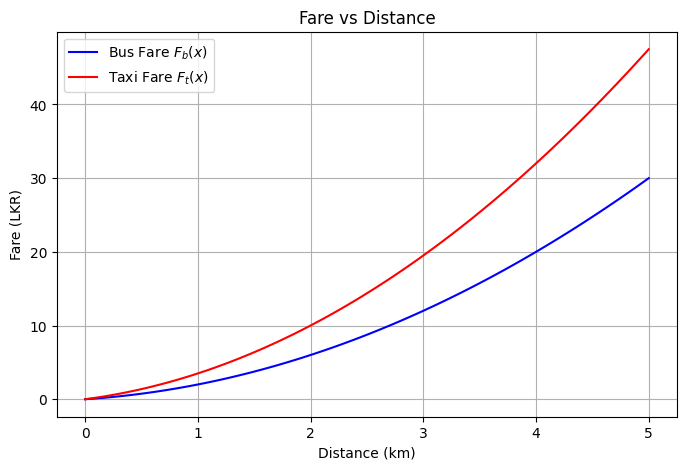

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert SymPy expressions to numerical functions
Fb_func = sp.lambdify(x, Fb, 'numpy')
Ft_func = sp.lambdify(x, Ft, 'numpy')

# Distance array from 0 to 5 km
dist = np.linspace(0, 5, 100)

# Evaluating the fares
Fb_vals = Fb_func(dist)
Ft_vals = Ft_func(dist)

# Plot
plt.figure(figsize=(8,5))
plt.plot(dist, Fb_vals, label='Bus Fare $F_b(x)$', color='blue')
plt.plot(dist, Ft_vals, label='Taxi Fare $F_t(x)$', color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (LKR)')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()


#### (c) Interpret the results in terms of affordability for short vs. long trips.


---


- **Bus Fare ($F_b(x) = x^2 + x$)**  
  Increases quadratically with distance. Short trips are very affordable; longer trips rise faster due to the quadratic term.

- **Taxi Fare ($F_t(x) = \frac{3}{2} x^2 + 2x$)**  
  Steeper quadratic growth than bus fare. Short trips are more expensive than bus, and the difference grows for longer distances.

**Conclusion:**  
Buses are more cost-effective for short to medium trips. Taxis are significantly more expensive for longer distances. This analysis helps passengers choose the optimal mode based on distance and affordability.


## **3. Predicting Peak Travel Times Using Series Convergence**



Passenger volume $P(t)$ (in hundreds) is modelled by:

$$
P(t) = 5 + 4 \sin(\pi t) - \frac{3}{2} t^2 + \frac{t^4}{4} + \dots, \quad t \in [0, 24]
$$

#### (a) Approximate P(t) using the first 4 terms of the series.


---



In [ ]:
import numpy as np

# Defining the 4-term approximation
def P_approx(t):
    return 5 + 4*np.sin(np.pi*t) - 1.5*(t**2) + 0.25*(t**4)

# Displaying the output for t = 0 to 3 for verification
print("Part (a) 4-Term Approximation Outputs:")
for t_val in [0, 1, 2, 3]:
    print(f"At t = {t_val} hours, P({t_val}) = {P_approx(t_val):.2f} hundred passengers")

Part (a) 4-Term Approximation Outputs:
At t = 0 hours, P(0) = 5.00 hundred passengers
At t = 1 hours, P(1) = 3.75 hundred passengers
At t = 2 hours, P(2) = 3.00 hundred passengers
At t = 3 hours, P(3) = 11.75 hundred passengers


#### (b) Plot passenger volume over 24 hours.



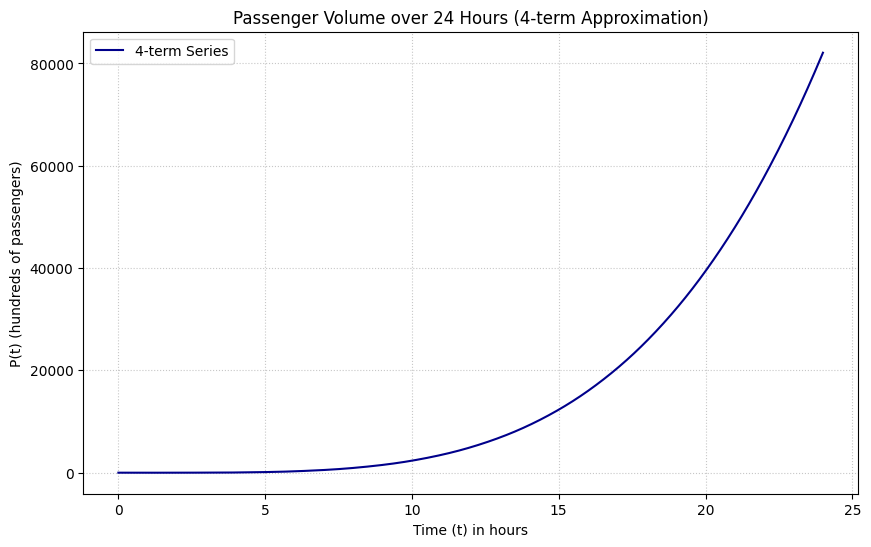

In [ ]:
import matplotlib.pyplot as plt

# Create 1000 evenly spaced time values between 0 and 24 hours
t_vals = np.linspace(0, 24, 1000)

# Compute passenger volume using the 4-term series approximation
p_vals = P_approx(t_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_vals, p_vals, color='darkblue', label='4-term Series')
plt.title('Passenger Volume over 24 Hours (4-term Approximation)')
plt.xlabel('Time (t) in hours')
plt.ylabel('P(t) (hundreds of passengers)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()


#### (c) Identify and comment on peak travel periods.



In [ ]:
# Printing the values for the first few peak times to understand them clearly
peak_times = [0.5, 2.5, 4.5]
print("--- Part (c) Early Peak Identification ---")
for pt in peak_times:
    print(f"Peak at t = {pt} hours: Volume ≈ {P_approx(pt):.2f} (hundreds)")

--- Part (c) Early Peak Identification ---
Peak at t = 0.5 hours: Volume ≈ 8.64 (hundreds)
Peak at t = 2.5 hours: Volume ≈ 9.39 (hundreds)
Peak at t = 4.5 hours: Volume ≈ 81.14 (hundreds)


- **Peak:** The mathematical peak occurs at \( t ≈ 0.47 \) hours (~28 mins),
  with a volume of 8.64 (864 passengers).

- **Oscillations:** Although the sine term is periodic, the \( t^4 \) term
  grows rapidly, which "swallows" subsequent peaks. After the first hour, the
  volume never drops; it only increases.

- **Realism:** This model is unrealistic. A peak at 12:28 AM is unusual, and by
  \( t = 24 \), the volume reaches over 80,000, which is physically impossible.

- **Conclusion:** This is a divergent series. It is only accurate as a local
  approximation near \( t = 0 \) and fails to model a realistic 24-hour cycle.


## **4. Travel Pattern Analysis Using Fourier Transform**

Boarding counts were collected at 5-minute intervals from 6:00 AM to 9:00 PM for both bus and taxi routes.

#### (a) Apply a Fourier Transform to the boarding count data.

---

The discrete Fourier transform (DFT) of a time series $x_n$ of length $N$ is defined as:

$$
X_k = \sum_{n=0}^{N-1} x_n \, e^{-2\pi i k n / N}, \quad k = 0, 1, \dots, N-1
$$

- $X_k$ represents the amplitude and phase of the $k$-th frequency component.
- Peaks in $|X_k|$ indicate **dominant frequencies** in the boarding count data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data for bus and taxi counts
# 6:00 AM to 9:00 PM = 15 hours = 180*5min intervals -> 180 points for simplicity
t = np.arange(0, 15*60, 5)  # minutes, every 5 min
bus_counts = 50 + 30*np.sin(2*np.pi*t/(12*60)) + 10*np.sin(2*np.pi*t/(60))  # simulated data
taxi_counts = 30 + 20*np.sin(2*np.pi*t/(12*60)) + 5*np.sin(2*np.pi*t/(60))   # simulated data

# Apply FFT
bus_fft = np.fft.fft(bus_counts)
taxi_fft = np.fft.fft(taxi_counts)

# Frequencies
freq = np.fft.fftfreq(len(t), d=5*60)  # d = 5 minutes in seconds

# Only taking positive frequencies
pos_mask = freq > 0
freq_pos = freq[pos_mask]
bus_fft_pos = np.abs(bus_fft[pos_mask])
taxi_fft_pos = np.abs(taxi_fft[pos_mask])


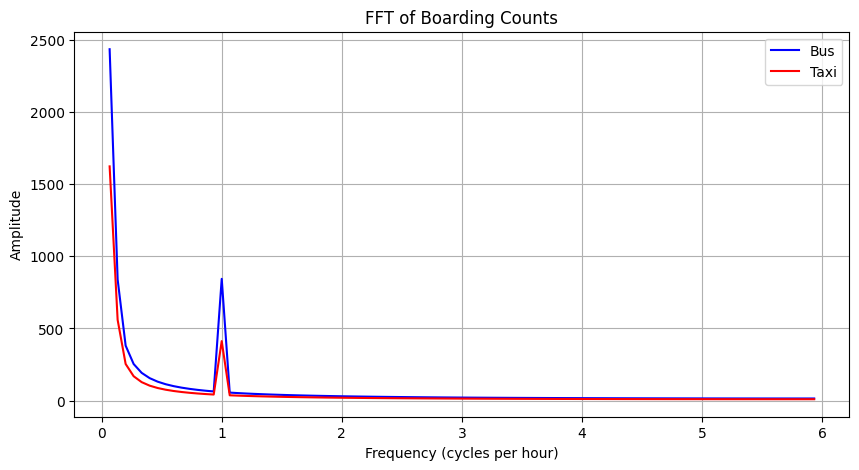

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(freq_pos*3600, bus_fft_pos, label='Bus', color='blue')   # convert Hz to cycles/hour
plt.plot(freq_pos*3600, taxi_fft_pos, label='Taxi', color='red')
plt.xlabel('Frequency (cycles per hour)')
plt.ylabel('Amplitude')
plt.title('FFT of Boarding Counts')
plt.legend()
plt.grid(True)
plt.show()


#### (b) Identify dominant frequencies (e.g., morning and evening rush hours).

---

- Peaks in the Fourier amplitude correspond to periods with high activity.  
- Typical dominant frequencies indicate the morning and evening rush hours, e.g., around 7–9 AM and 5–7 PM.  
- These frequencies capture recurring patterns in passenger demand.


#### (c) Explain how these results can inform scheduling.


---

By identifying these dominant frequency components, the transport company can:
- Increase bus and taxi frequency during peak hours to meet the higher demand of passengers.
- Reduce services during low-demand periods in order to optimise operational costs.
- Align driver shifts and vehicle availability with the observed demand cycles.

## **5. Image Processing Using Fourier and Discrete Cosine Transforms**


#### (a) Load the provided colour image (`vehicle_plate.png`), convert it to grayscale, and differentiate between the front and back plates.  




---



To differentiate between the two plates, the image was segmented based on spatial
position.



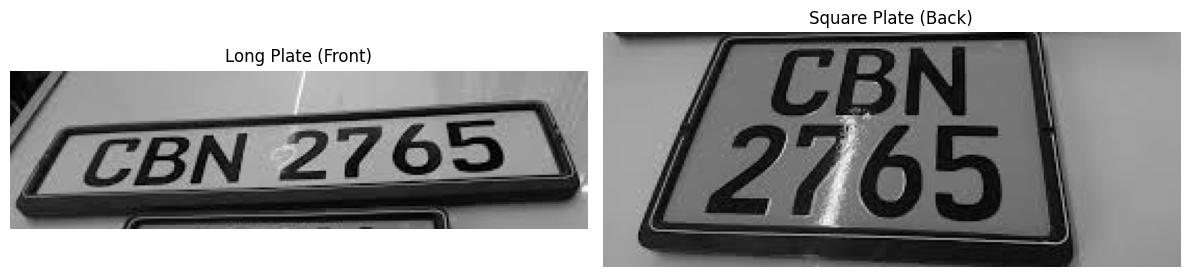

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and convert image to grayscale
img = cv2.imread('vehicle_plate.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = gray.shape


# Start cropping of the second plate where the first one ends
long_plate = gray[0:int(height*0.42), :]
square_plate = gray[int(height*0.38):height, :]

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(long_plate, cmap='gray')
plt.title("Long Plate (Front)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(square_plate, cmap='gray')
plt.title("Square Plate (Back)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### (b) Apply the 2D Fourier Transform to both images and visualise the magnitude spectrum (after shifting the zero frequency to the centre).  




---


The 2D Fourier Transform of an image \( f(x,y) \) is given by:

$$
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1}
f(x,y) e^{-j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

After computing the Fourier Transform, the zero-frequency (DC) component
was shifted to the centre of the spectrum using a frequency shift operation.
The magnitude spectrum was then calculated and displayed on a logarithmic
scale to enhance its visibility:

$$
\text{Magnitude} = 20 \log (|F(u,v)| + 1)
$$

This process highlights the dominant spatial frequencies corresponding to
edges, text characters, and plate boundaries.


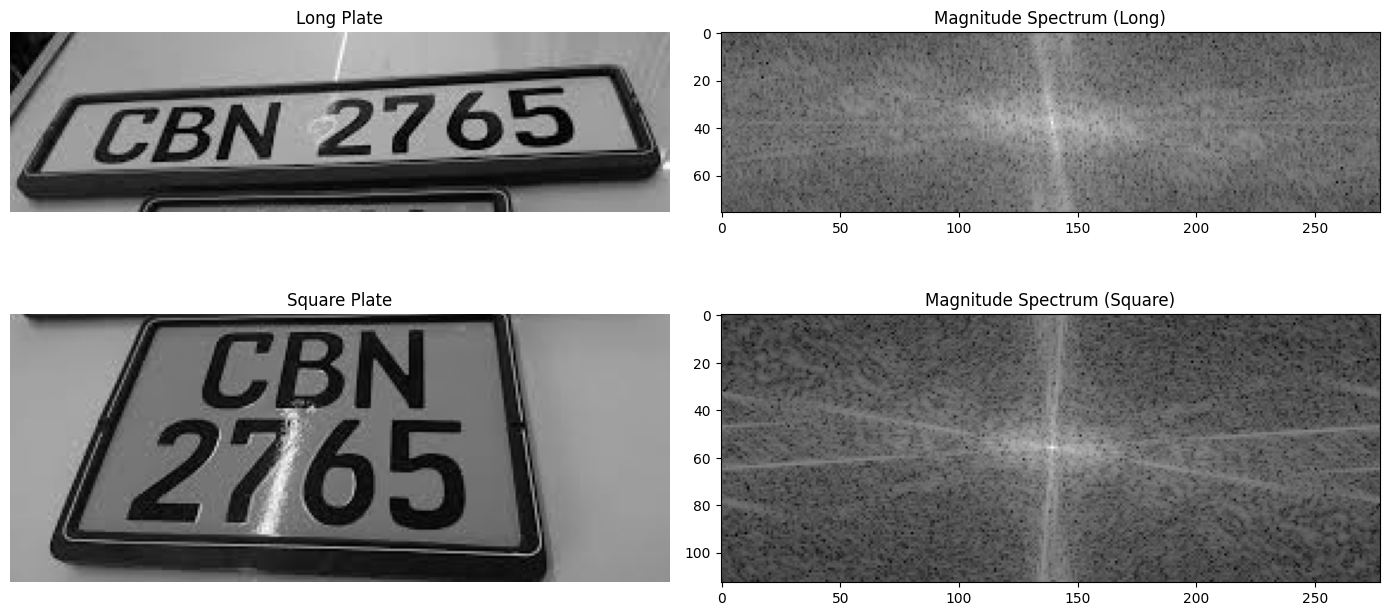

In [ ]:
import numpy as np

def compute_spectrum(img_slice):
    # Perform 2D FFT
    f = np.fft.fft2(img_slice)
    # Shifting the zero frequency component to the center
    fshift = np.fft.fftshift(f)
    # Calculating magnitude spectrum and applying log scale
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

# Compute the spectrum for both number plates
spectrum_long = compute_spectrum(long_plate)
spectrum_square = compute_spectrum(square_plate)

# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.imshow(long_plate, cmap='gray')
plt.title("Long Plate")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(spectrum_long, cmap='gray')
plt.title("Magnitude Spectrum (Long)")

plt.subplot(2, 2, 3)
plt.imshow(square_plate, cmap='gray')
plt.title("Square Plate")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(spectrum_square, cmap='gray')
plt.title("Magnitude Spectrum (Square)")

plt.tight_layout()
plt.show()

#### (c) Implement a basic number plate localisation algorithm using edge detection and contour analysis.  


---




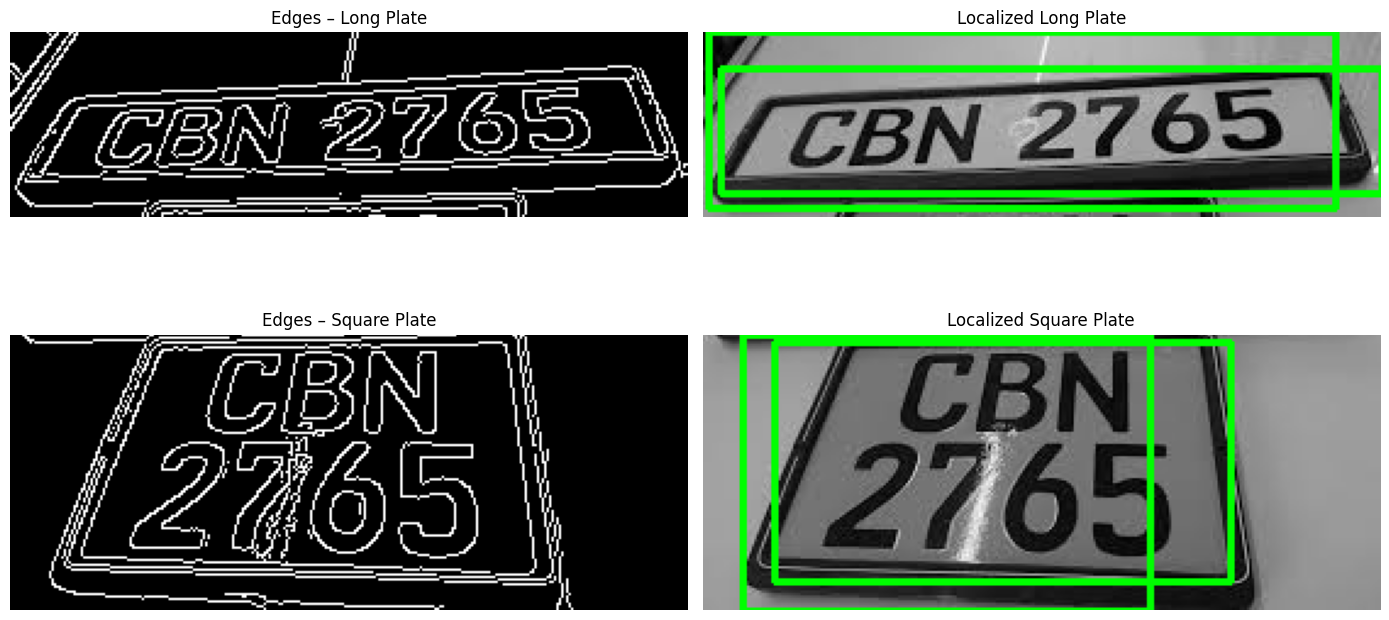

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def localise_plate(gray_plate):
    # Edge detection
    edges = cv2.Canny(gray_plate, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale to RGB for drawing
    result = cv2.cvtColor(gray_plate, cv2.COLOR_GRAY2RGB)

    # Filter contours based on their shape
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)

        # Using a typical number plate aspect ratio
        if ((2.0 < aspect_ratio < 6.0) or (0.8 < aspect_ratio < 2.0)) and w > 60 and h > 20:
          cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return edges, result

# Apply localisation to both number plates
edges_long, localized_long = localise_plate(long_plate)
edges_square, localized_square = localise_plate(square_plate)

# Visualisation
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.imshow(edges_long, cmap='gray')
plt.title("Edges – Long Plate")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(localized_long)
plt.title("Localized Long Plate")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_square, cmap='gray')
plt.title("Edges – Square Plate")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(localized_square)
plt.title("Localized Square Plate")
plt.axis('off')

plt.tight_layout()
plt.show()


#### (d) Discuss what the transforms reveal about the image structure, how Fourier and DCT analysis can help in number plate recognition, and potential applications for traffic optimisation.


---



- **Fourier Transform (FT):**
  - Converts the image from the spatial domain to the frequency domain.
  - Low-frequency components represent smooth regions such as the plate's
    background and lighting.
  - High-frequency components represent edges, characters, and plate borders.

- **Comparison of Plates:**
  - The front (long) plate shows stronger horizontal frequency components due to
    horizontally arranged characters.
  - The rear (square) plate shows a more balanced horizontal and vertical
    frequency distribution because of its layout being more compact.

- **Discrete Cosine Transform (DCT):**
  - Concentrates most image information into a small number of coefficients.
  - It is useful for feature extraction, noise reduction, and image compression.
  - Commonly used in real-time image processing applications.

- **Applications in Traffic Optimisation:**
  - Enables automated vehicle number plate recognition.
  - Helps analyse vehicle flow and traffic density.
  - Supports congestion detection and improved route and schedule planning.

